### Senior Insights Analyst Task

Task Overview:
As a Senior Insights Analyst for B.C, the reporting, analysis and insights you deliver will play a crucial role in helping us to make informed decisions, optimise our operations, and measure the impact of our programs. To assess your abilities and suitability for this role, we have prepared a practical task that involves analysing a dataset and providing actionable insights.

Task instructions:
* Along with this instruction pack, we have provided you with a dataset called “RG data.xlsx”.<b>The dataset contains information related to supporters providing regular gifts to the charity since 2010 and donation amounts.</b> Familiarise yourself with the dataset’s structure and its variables. If necessary, clean and preprocess the data to ensure it is ready for analysis. 
* Conduct exploratory data analysis to <b>gain insights into the performance of each of the regular gifts.</b> Perform any necessary statistical analyses to <b>identify trends, patterns and correlations within the data.</b> In doing so, <b>think about the different channels, frequencies, and dates.</b>
* <b>Create visualisations (charts, graphics)</b> that effectively communicate your findings to <b>non-technical stakeholders.</b> Ensure that these are clear, insightful and support your conclusions
* Based on your analysis and visualisations, <b>provide a summary of the key insights gained from the data. Suggest any data-driven recommendations from the data available.</b> 

<b>Output:</b>
Prepare a 10-15 minute presentation (based on the above) documenting your analysis, insights and recommendations. 

In [499]:
# Import libraries and packages I may need for analysis & visualising the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
# Make sure all columns in the dataframe are visible for easier inspection
pd.set_option("max_columns", None)

### Data Exploration

In [500]:
# Import the data from my downloads folder and convert to Pandas DataFrame
df = pd.read_excel(r'C:\Users\david\Downloads\RG data.xlsx')
# Inspect the data: cols, length, types, nulls
df.info() 
# Data looks nice and clean: no nulls, uniform length, column names make sense, data types seem appropriate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Regular Gift type               648 non-null    object
 1   Frequency of gift               648 non-null    object
 2   Channel                         648 non-null    object
 3   Year                            648 non-null    int64 
 4   Month                           648 non-null    object
 5   Number of new donors per month  648 non-null    int64 
 6   Cancellations this month        648 non-null    int64 
 7   Total value of donations        648 non-null    int64 
 8   Total numbe rof donations       648 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 45.7+ KB


In [501]:
# Summary statistics
df.describe()

,Year,Number of new donors per month,Cancellations this month,Total value of donations,Total numbe rof donations
count,648.000000,648.000000,648.000000,648.000000,648.000000
mean,2019.757716,216.175926,71.845679,19770.478395,3041.441358
std,2.110898,586.270954,318.874393,46431.203450,7658.412950
min,2010.000000,2.000000,0.000000,0.000000,0.000000
25%,2018.000000,4.000000,0.000000,382.000000,56.000000
50%,2020.000000,22.000000,0.000000,2481.000000,344.000000
75%,2021.000000,132.000000,18.000000,17567.000000,2960.500000
max,2024.000000,5098.000000,3180.000000,518812.000000,102132.000000


In [502]:
# Inspect a random sample of data to get a better feel for it
df.sample(10)

,Regular Gift type,Frequency of gift,Channel,Year,Month,Number of new donors per month,Cancellations this month,Total value of donations,Total numbe rof donations
60,core,Monthly,Direct Mail,2022,April,16,8,1014,154
169,core,Monthly,Online,2020,April,214,58,38174,5280
379,Lottery,Monthly,Face 2 Face,2019,December,156,0,11388,2552
5,core,Monthly,Direct Mail,2014,June,2,0,966,218
229,core,Annually,Direct Mail,2021,December,2,0,318,6
611,Sponsorship,Monthly,Online,2019,October,106,60,14966,2896
493,Lottery,Monthly,Online,2020,April,62,0,7976,1542
226,core,Annually,Direct Mail,2019,January,2,0,2500,10
295,Lottery,Monthly,Direct Mail,2018,September,20,0,3610,740
270,core,Annually,Online,2023,July,2,0,0,0


In [503]:
# Checking for duplicates - none found
x = df.duplicated().sort_values(ascending=True)
x.unique()

array([False])

In [504]:
# Column spelling corrected
df.rename({'Total numbe rof donations': 'Total number of donations'}, axis=1, inplace=True)

In [505]:
# Sort months into calendar order
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=sort_order, ordered=True)

In [506]:
# Split the columns into numerical and categorical variables for easier analysis
numerical = ['Year', 'Number of new donors per month', 'Cancellations this month', 'Total value of donations', 'Total number of donations']
categorical = ['Regular Gift type', 'Frequency of gift', 'Channel', 'Month']
df1 = df[numerical + categorical]

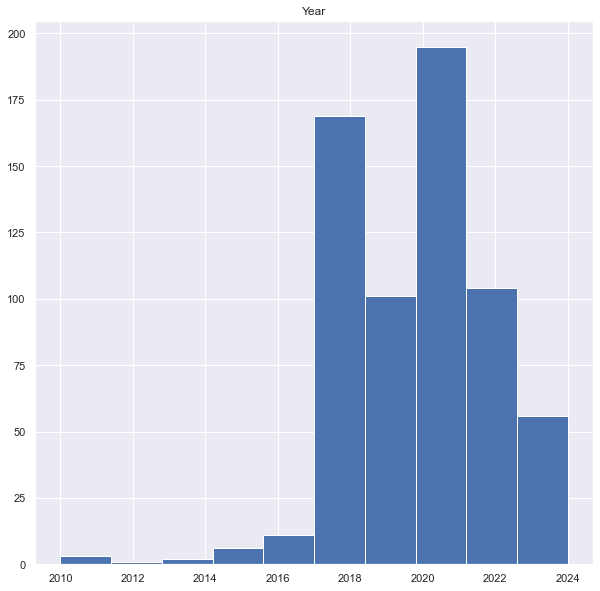

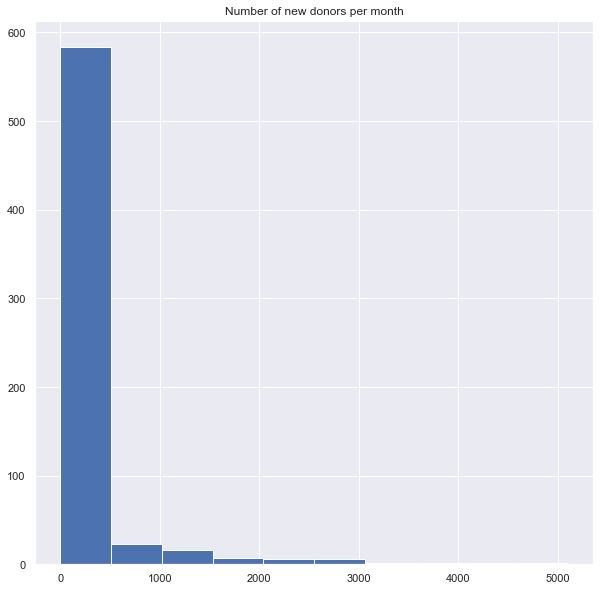

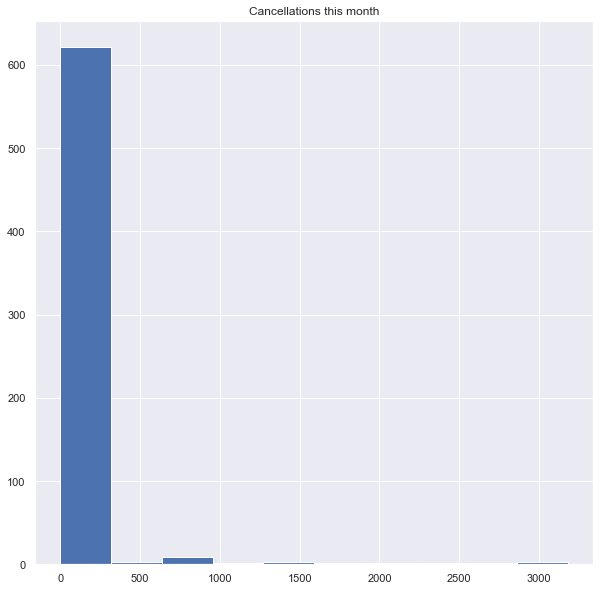

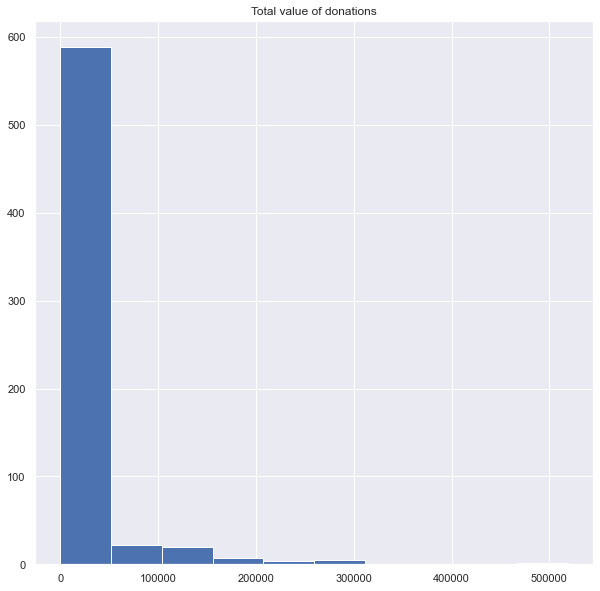

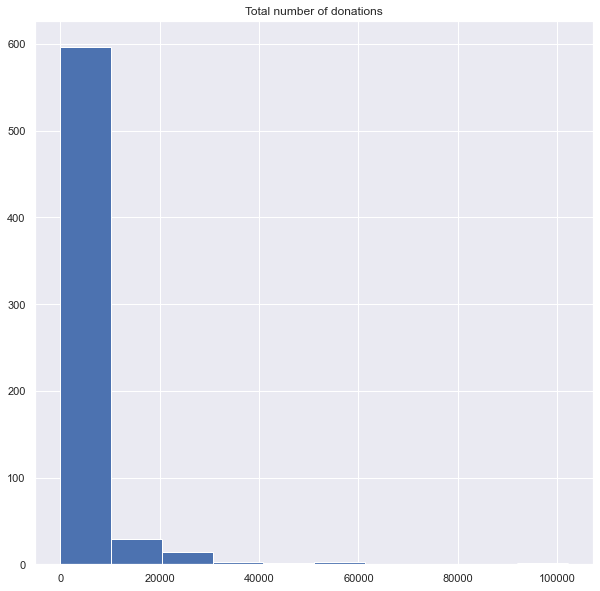

In [507]:
# Plot distributions of numerical variables
for i in df1[numerical].columns:
    plt.hist(df1[numerical][i])
    plt.title(i)
    plt.show()

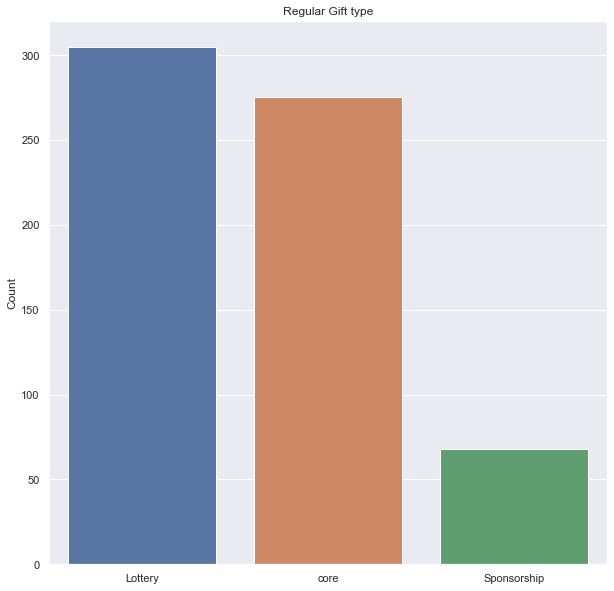

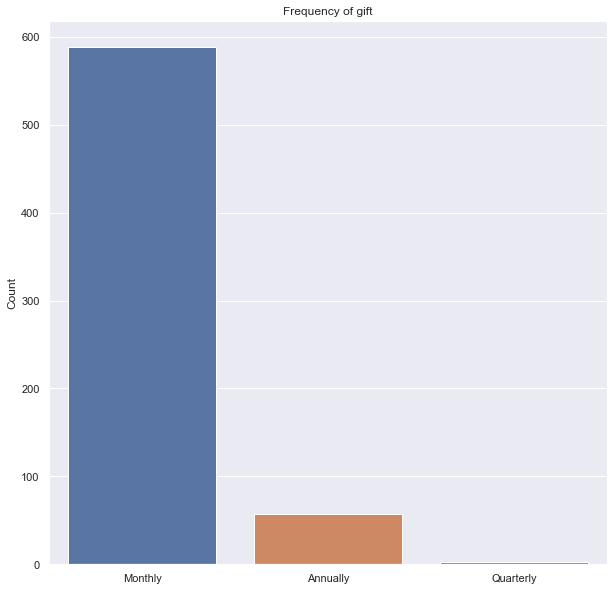

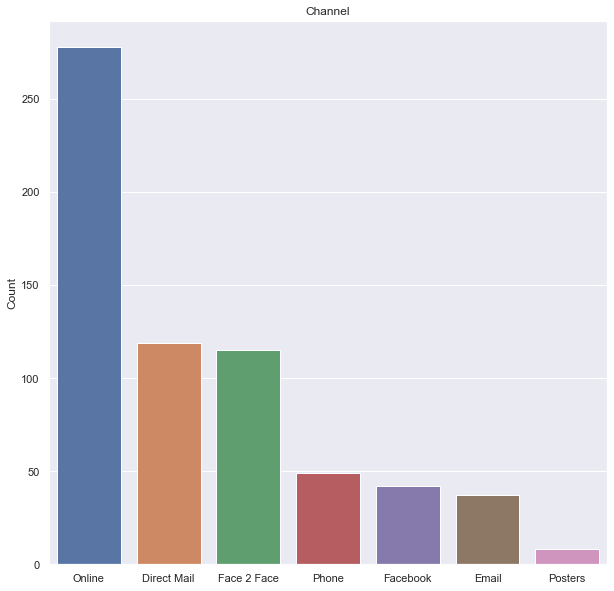

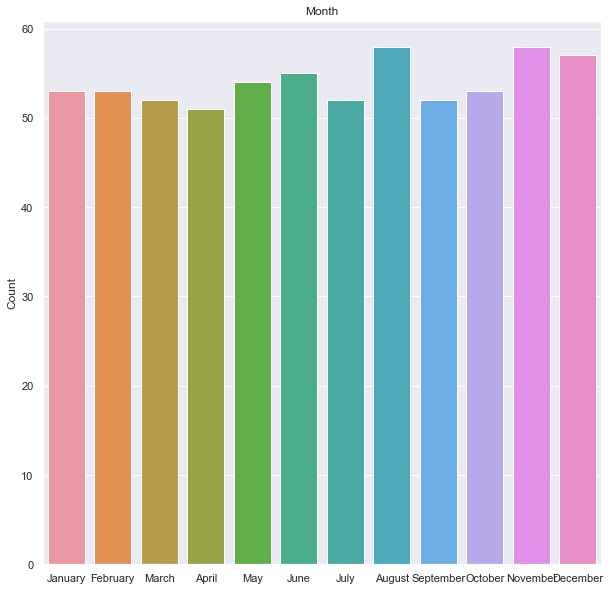

In [536]:
# Create barplots to visualise the categorical variables
for i in df1[categorical].columns:
    ax = sns.barplot(x=df1[categorical][i].value_counts().index, y=df1[categorical][i].value_counts())
    ax.set_title(i)
    ax.set_ylabel("Count")
    plt.show()

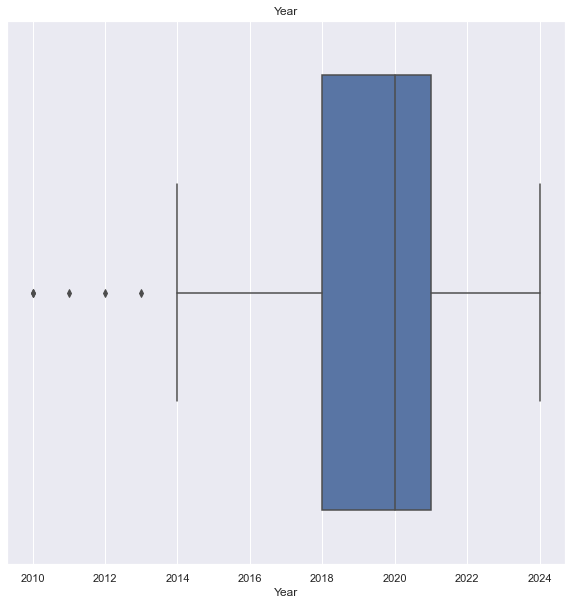

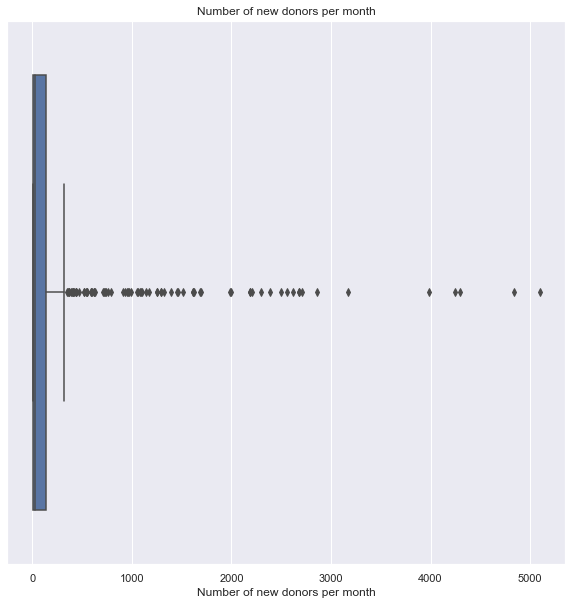

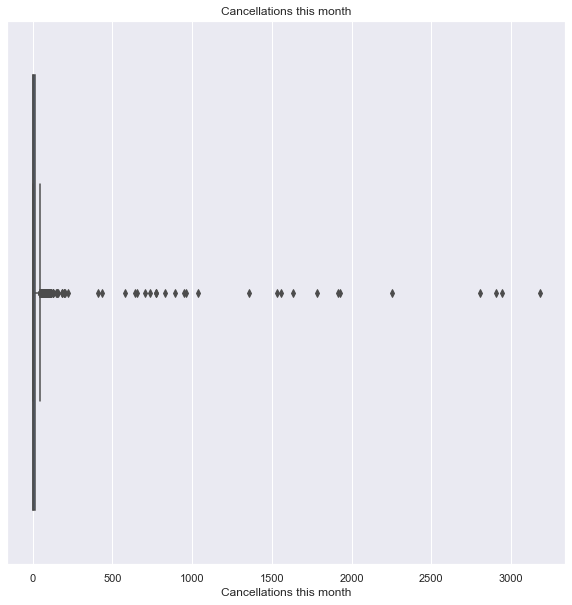

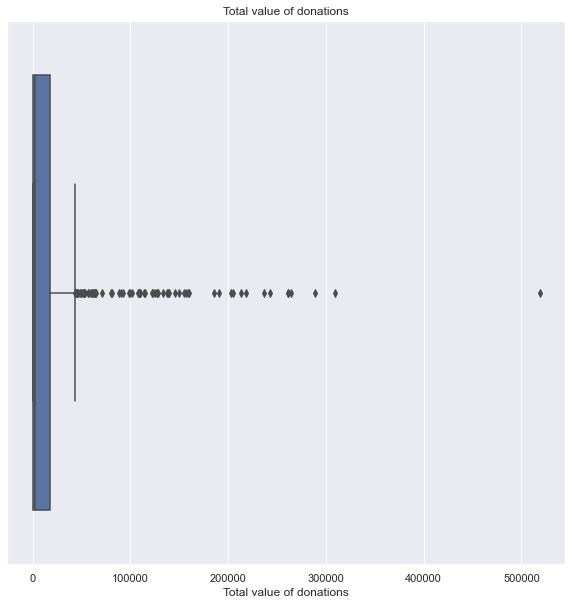

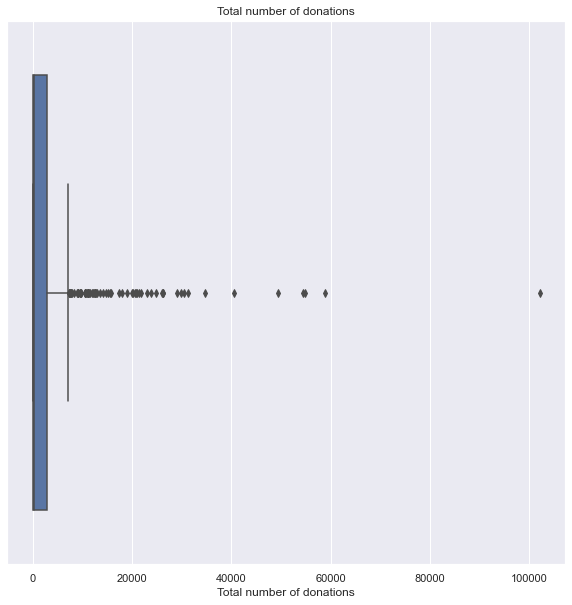

In [509]:
# Boxplots of the numerical varaibles to eyeball the dispersion (IQR & outliers) of the data
for i in df1[numerical].columns:
    ax = sns.boxplot(x=df1[numerical][i])
    ax.set_title(i)
    plt.show()
# Limited data before Year 2014
# Many months when no. new donors far exceeded the mean. What caused these bumbper months? - Investigate
# Cancellations has a very tight IQR and a number of extreme outliers - worth investigating
# 1 Donation >£500,00.00!
# 1 month in which total no. donations exceeded 100k - what happened during this month and how can we replicate?

<AxesSubplot:>

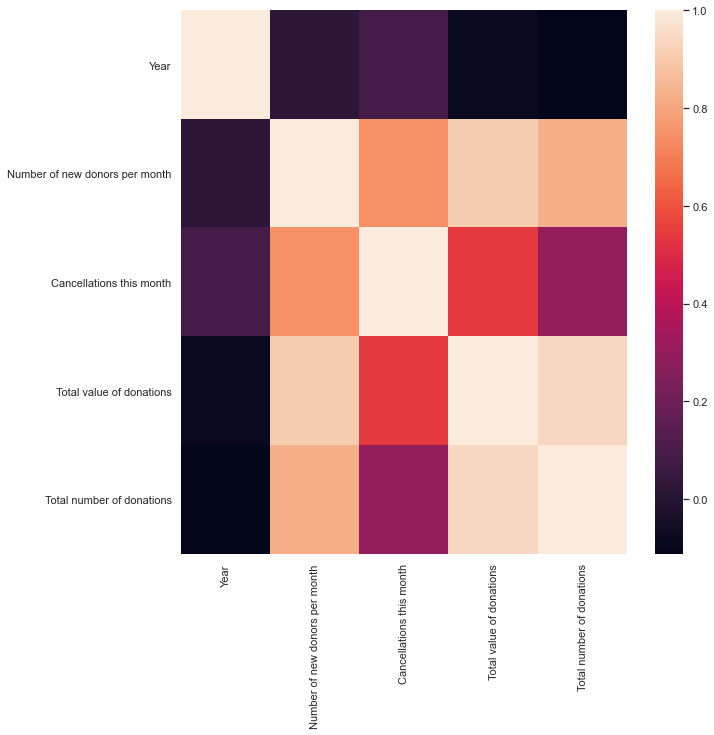

In [510]:
# Heatmap of correlations between numerical variables
sns.set(rc={'figure.figsize':(10,10)})
df1[numerical].corr()
sns.heatmap(df1[numerical].corr())

In [511]:
# Values of correlations:
# Unsurprisingly, no. new donors per month is highly correlated to total value of donations (0.91) and total no. donations (0.83)
# Total value & Total no. donations = 0.94 (strongest)
# Interestingly, no. of new donors is correlated to no. cancellations: 0.75 - this seems counterintuitive... - investigate
df1[numerical].corr()

,Year,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations
Year,1.000000,0.016043,0.087659,-0.085590,-0.112345
Number of new donors per month,0.016043,1.000000,0.747863,0.912061,0.827732
Cancellations this month,0.087659,0.747863,1.000000,0.542614,0.300600
Total value of donations,-0.085590,0.912061,0.542614,1.000000,0.942389
Total number of donations,-0.112345,0.827732,0.300600,0.942389,1.000000


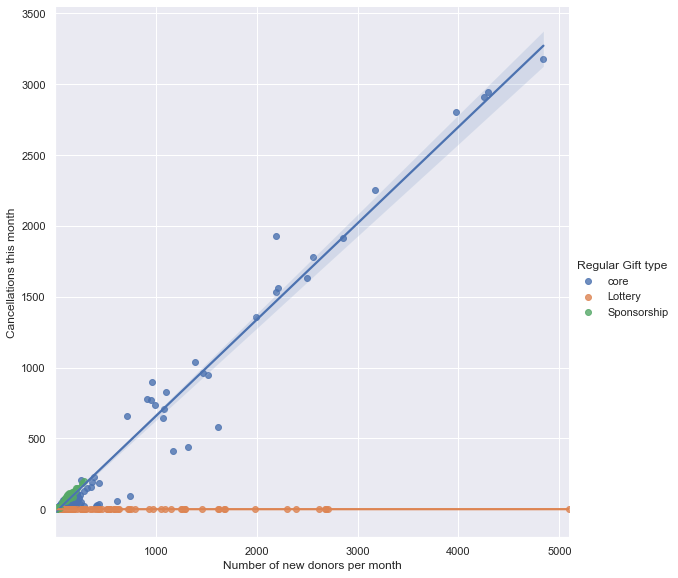

In [512]:
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', hue='Regular Gift type', data=df1, height=8)

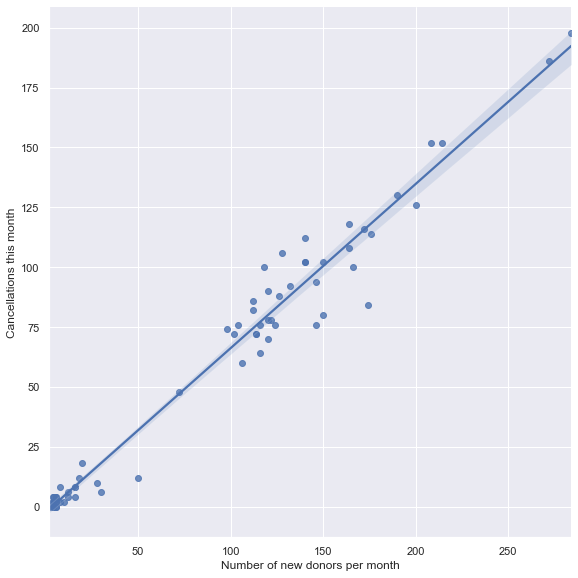

In [513]:
# Just checking the relationship for 'Sponsorship' gift type on its own
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', data=df1[df1['Regular Gift type'] == 'Sponsorship'], height=8)

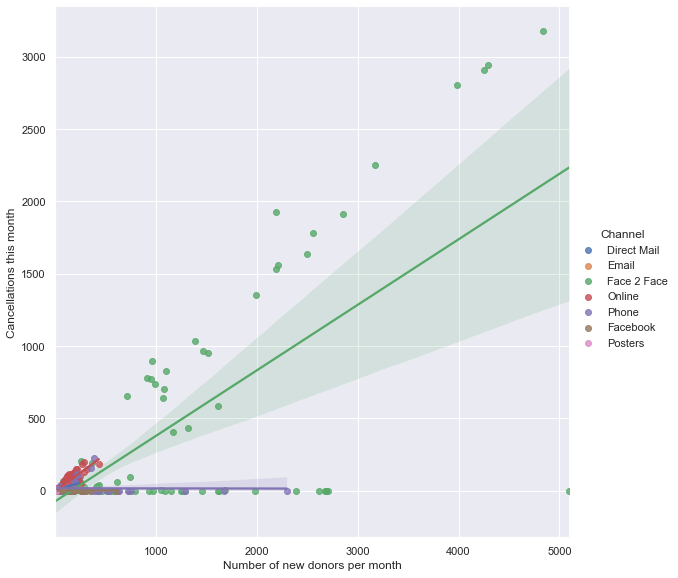

In [514]:
sns.lmplot(x='Number of new donors per month', y='Cancellations this month', hue='Channel', data=df1, height=8)
# data=df1[~df1['Channel'].isin(['Online'])]

<AxesSubplot:xlabel='Number of new donors per month', ylabel='Total value of donations'>

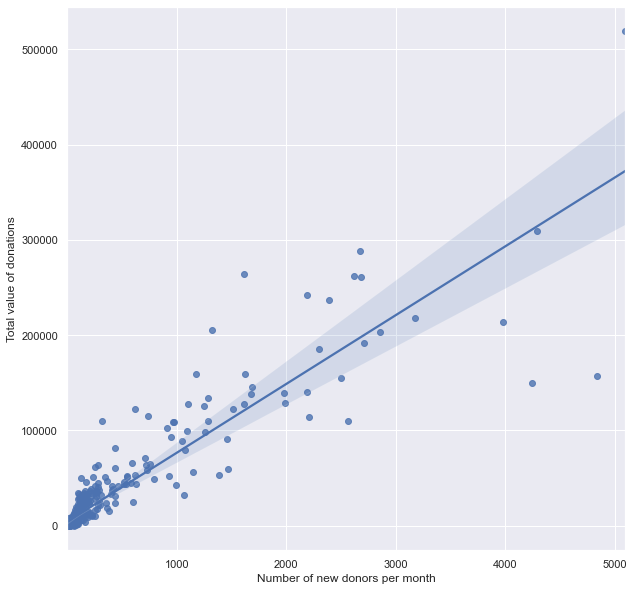

In [515]:
sns.regplot(x='Number of new donors per month', y='Total value of donations', data=df1)

<AxesSubplot:xlabel='Number of new donors per month', ylabel='Total number of donations'>

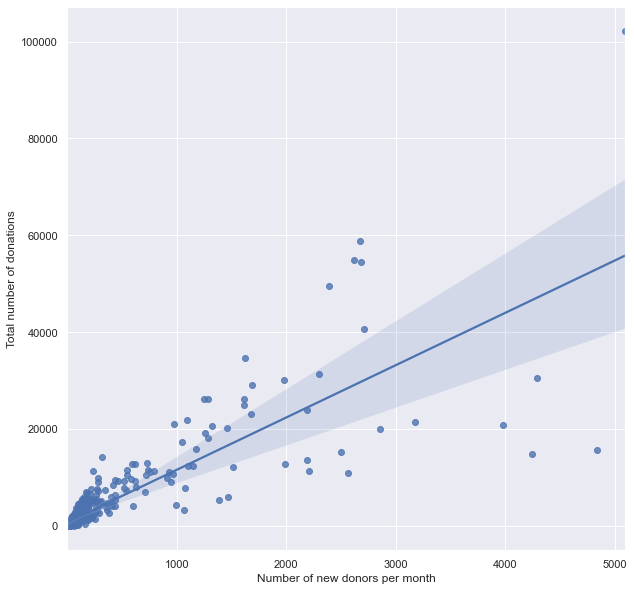

In [516]:
sns.regplot(x='Number of new donors per month', y='Total number of donations', data=df1)

<AxesSubplot:xlabel='Total value of donations', ylabel='Total number of donations'>

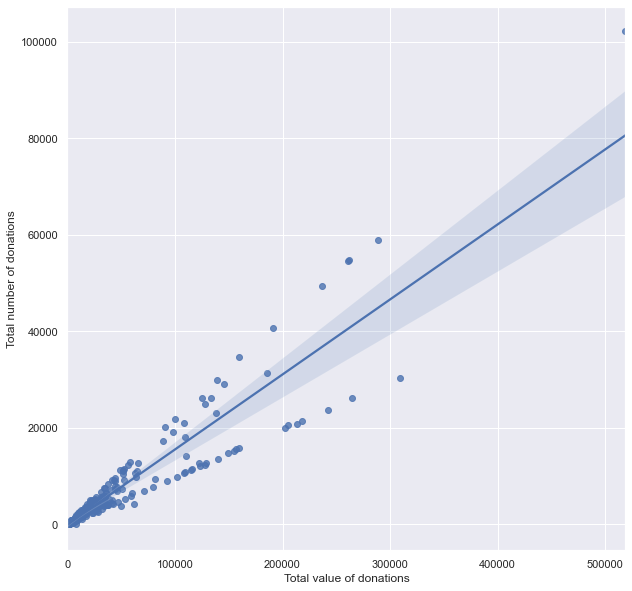

In [517]:
sns.regplot(x='Total value of donations', y='Total number of donations', data=df1)

In [518]:
df2 = pd.pivot_table(df1, index = 'Regular Gift type', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df2

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Regular Gift type,,,,
core,42604,71900,720120,6335220
Lottery,12,62194,1090390,5653894
Sponsorship,3940,5988,160344,822156


In [519]:
df3 = pd.pivot_table(df1, index = 'Frequency of gift', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df3

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Frequency of gift,,,,
Monthly,46464,139916,1970562,12792332
Annually,90,162,288,18818
Quarterly,2,4,4,120


In [520]:
df4 = pd.pivot_table(df1, index = 'Channel', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df4

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Channel,,,,
Face 2 Face,37060,100682,1198300,8032680
Online,8212,18416,442862,2808002
Phone,806,13768,176702,1045378
Facebook,4,4690,81710,517884
Direct Mail,460,2032,60084,340310
Email,14,464,10970,65470
Posters,0,30,226,1546


In [521]:
df5 = pd.pivot_table(df1, index = 'Year', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df5

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Year,,,,
2018,10044,30986,518720,3458994
2019,1996,26320,563028,2997120
2021,7950,22396,242430,1811256
2022,22410,35678,186500,1773638
2020,1284,11640,230974,1365000
2017,2056,10514,211580,1280056
2023,808,2176,6572,59470
2016,2,342,8404,49326
2015,4,16,1034,7556


<AxesSubplot:xlabel='Month', ylabel='Total value of donations'>

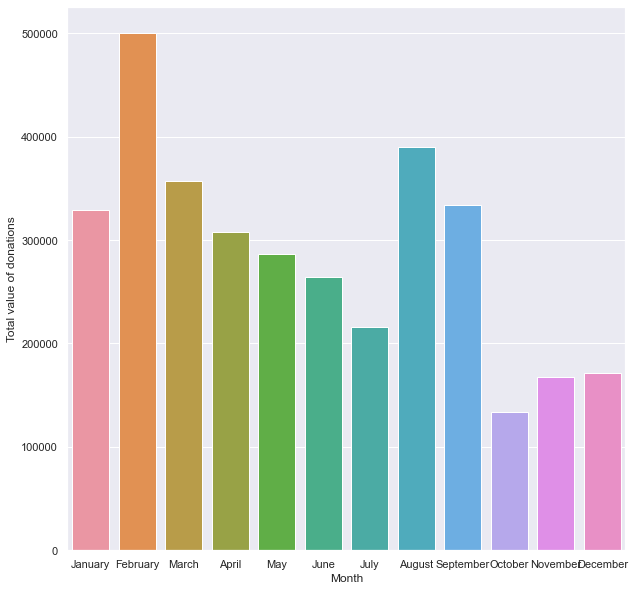

In [557]:
_2018 = df1.loc[df1['Year'] == 2018, ['Month','Total value of donations']].groupby(['Month']).sum().sort_values('Total value of donations', ascending=False)
_2018_ = _2018.reset_index()
sns.barplot(x='Month', y='Total value of donations', data=_2018_)

In [523]:
df6 = pd.pivot_table(df1, index = 'Month', values = ['Number of new donors per month','Total number of donations','Total value of donations','Cancellations this month'], aggfunc='sum').sort_values('Total value of donations', ascending=False)
df6

,Cancellations this month,Number of new donors per month,Total number of donations,Total value of donations
Month,,,,
May,3680,14910,230398,1431876
February,2782,11102,192986,1261598
September,5078,13468,192614,1226518
August,2608,11500,185022,1118362
November,7540,14702,137218,1098300
January,4670,11260,163462,1084332
April,2862,10234,151780,1018558
July,1602,10680,174988,995672
March,2718,9654,149484,992628


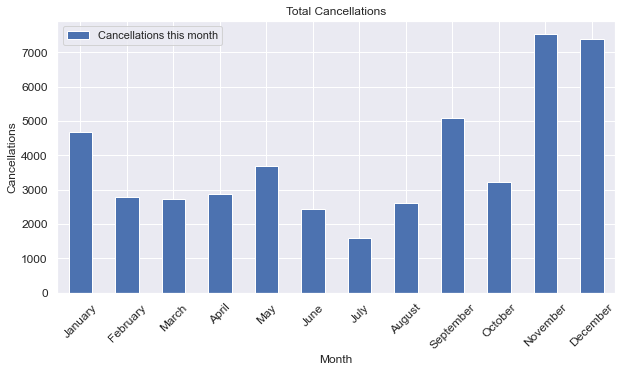

In [524]:
# Create the pivot table
df7 = pd.pivot_table(df1, index='Month', values=['Cancellations this month'], aggfunc='sum')

# Plot the data
df7.plot(kind='bar', figsize=[10, 5], ylabel="Cancellations", title="Total Cancellations", rot=45, fontsize=12)
plt.show()

In [525]:
# Some months missing from 2023
x = df1[['Year','Month']].drop_duplicates().sort_values('Year', ascending=False)
x.head(25)

,Year,Month
272,2024,March
71,2023,April
75,2023,August
74,2023,July
73,2023,June
210,2023,December
72,2023,May
70,2023,March
69,2023,February
68,2023,January


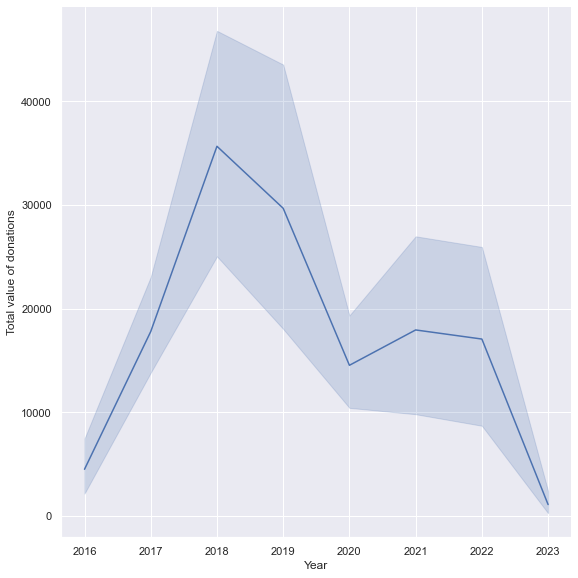

In [526]:
sns.relplot(data=df1[df1['Year'].between(2016,2023)], x='Year', y='Total value of donations',kind='line', height=8)

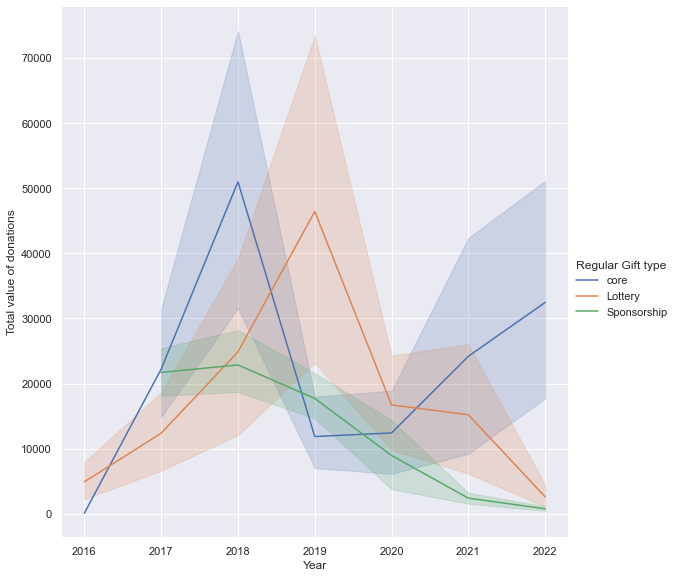

In [527]:
sns.relplot(data=df1[df1['Year'].between(2016,2022)], x='Year', y='Total value of donations', hue='Regular Gift type',kind='line', height=8)

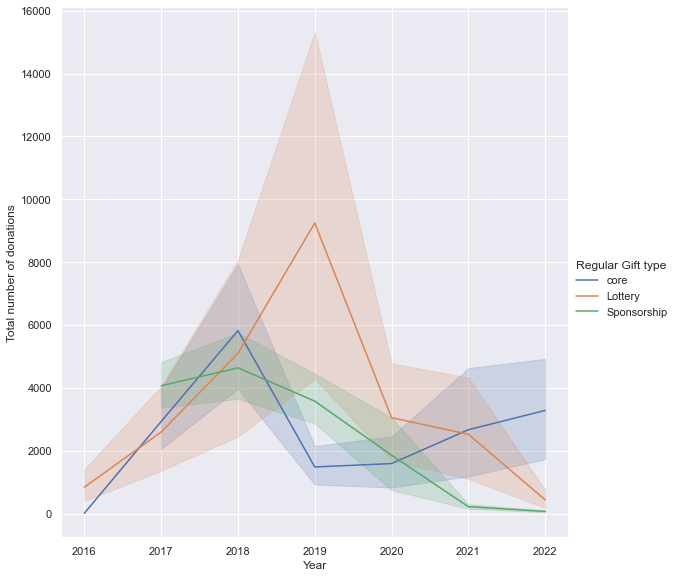

In [528]:
sns.relplot(data=df1[df1['Year'].between(2016,2022)], x='Year', y='Total number of donations', hue='Regular Gift type',kind='line', height=8)

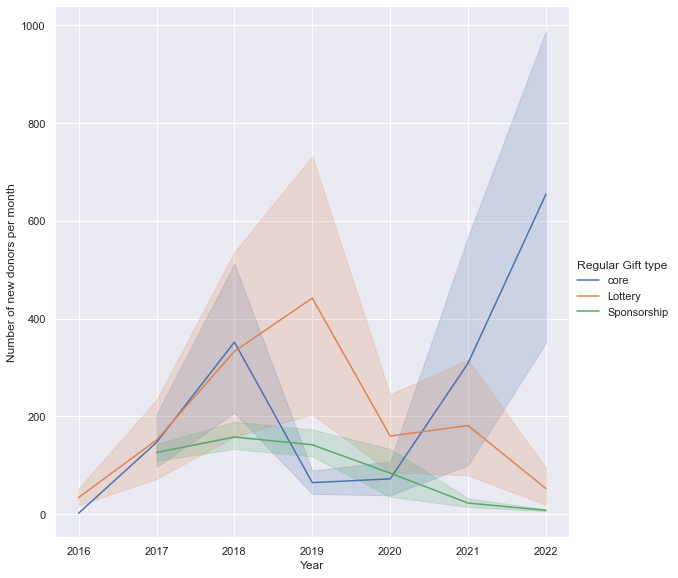

In [529]:
sns.relplot(data=df1[df1['Year'].between(2016,2022)], x='Year', y='Number of new donors per month', hue='Regular Gift type',kind='line', height=8)

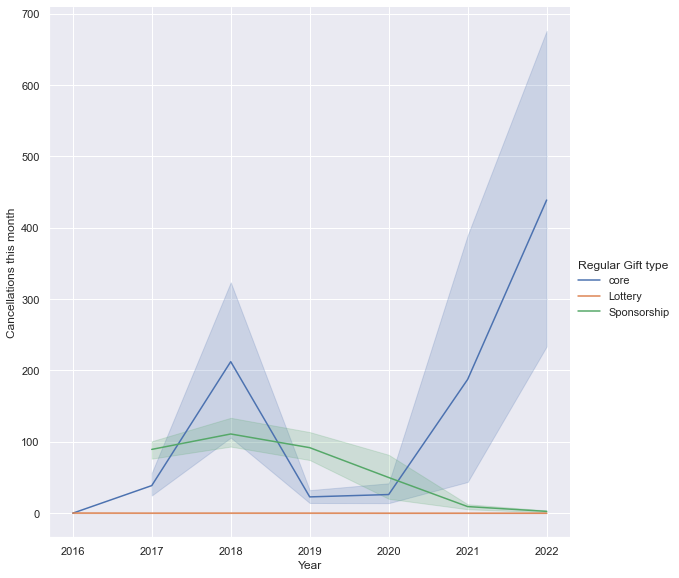

In [530]:
sns.relplot(data=df1[df1['Year'].between(2016,2022)], x='Year', y='Cancellations this month', hue='Regular Gift type',kind='line', height=8)

In [531]:
df.head()

,Regular Gift type,Frequency of gift,Channel,Year,Month,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations
0,core,Monthly,Direct Mail,2010,February,2,0,2730,322
1,core,Monthly,Direct Mail,2010,October,2,0,1970,306
2,core,Monthly,Direct Mail,2011,October,2,2,788,262
3,core,Monthly,Direct Mail,2012,September,2,0,1448,260
4,core,Monthly,Direct Mail,2013,May,2,0,952,244


In [532]:
df1['Cancellation Rate %'] = round(df1['Cancellations this month'] / df1['Total number of donations'] * 100,1)
df1.loc[~np.isfinite(df1['Cancellation Rate %']), 'Cancellation Rate %'] = np.nan
df1.sort_values('Cancellation Rate %', ascending=False)

<ipython-input-532-d7068b18b834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cancellation Rate %'] = round(df1['Cancellations this month'] / df1['Total number of donations'] * 100,1)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Year,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations,Regular Gift type,Frequency of gift,Channel,Month,Cancellation Rate %
646,2023,4,4,20,2,Sponsorship,Monthly,Online,June,200.0
245,2019,4,4,6,2,core,Annually,Online,September,200.0
257,2021,2,2,20,2,core,Annually,Online,September,100.0
247,2019,2,2,10,2,core,Annually,Online,November,100.0
242,2019,2,2,10,2,core,Annually,Online,March,100.0
251,2020,2,2,40,2,core,Annually,Online,May,100.0
241,2019,2,2,10,2,core,Annually,Online,February,100.0
253,2020,2,2,10,2,core,Annually,Online,November,100.0
256,2021,2,2,6,2,core,Annually,Online,April,100.0
264,2022,4,2,46,2,core,Annually,Online,December,100.0


In [533]:
df1['New Donor Rate %'] = round(df1['Number of new donors per month'] / df1['Total number of donations'] * 100,1)
df1.loc[~np.isfinite(df1['New Donor Rate %']), 'New Donor Rate %'] = np.nan
df1.sort_values('New Donor Rate %', ascending=False)

<ipython-input-533-3f5b2813a667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['New Donor Rate %'] = round(df1['Number of new donors per month'] / df1['Total number of donations'] * 100,1)
C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Year,Number of new donors per month,Cancellations this month,Total value of donations,Total number of donations,Regular Gift type,Frequency of gift,Channel,Month,Cancellation Rate %,New Donor Rate %
646,2023,4,4,20,2,Sponsorship,Monthly,Online,June,200.0,200.0
264,2022,4,2,46,2,core,Annually,Online,December,100.0,200.0
245,2019,4,4,6,2,core,Annually,Online,September,200.0,200.0
207,2023,80,8,582,76,core,Monthly,Online,June,10.5,105.3
257,2021,2,2,20,2,core,Annually,Online,September,100.0,100.0
267,2023,4,0,12,4,core,Annually,Online,March,0.0,100.0
622,2020,4,4,20,4,Sponsorship,Monthly,Online,November,100.0,100.0
266,2023,2,0,50,2,core,Annually,Online,February,0.0,100.0
265,2023,4,2,56,4,core,Annually,Online,January,50.0,100.0
263,2022,2,0,6,2,core,Annually,Online,November,0.0,100.0
